## Introduction to Regression with Neural Networks in TensorFlow
Thera ara many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data to view and fit

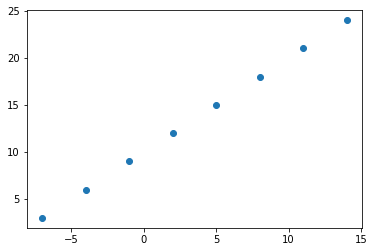

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in order words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 10.7560 - mae: 10.7560
Epoch 2/5
1/1 [==============================] - 0s 23ms/step - loss: 10.6235 - mae: 10.6235
Epoch 3/5
1/1 [==============================] - 0s 32ms/step - loss: 10.4910 - mae: 10.4910
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 10.3585 - mae: 10.3585
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.2260 - mae: 10.2260


In [9]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 1s 631ms/step


array([[16.352942]], dtype=float32)

In [11]:
y_pred + 11

array([[27.352942]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units( also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [12]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 17.5986 - mae: 17.5986
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 17.3174 - mae: 17.3174
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 17.0361 - mae: 17.0361
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 16.7549 - mae: 16.7549
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 16.4736 - mae: 16.4736
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 16.1924 - mae: 16.1924
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 15.9111 - mae: 15.9111
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 15.6299 - mae: 15.6299
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 15.3486 - mae: 15.3486
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 15.0674 - mae: 15.0674
Epoch 11/100
1/1 [==============================] -

In [13]:
# Remind ourselfs of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# Let's see if our model's prediction has improved...
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 1s 706ms/step


array([[29.824692]], dtype=float32)

In [15]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layers with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 13.3548 - mae: 13.3548
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 10.4438 - mae: 10.4438
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 8.2536 - mae: 8.2536
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 5.8993 - mae: 5.8993
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 4.0392 - mae: 4.0392
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 4.9264 - mae: 4.9264
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 5.4908 - mae: 5.4908
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 5.4084 - mae: 5.4084
Epoch 9/100
1/1 [==============================] - 0s 30ms/step - loss: 4.9092 - mae: 4.9092
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 4.1582 - mae: 4.1582
Epoch 11/100
1/1 [==============================] - 0s 24ms/step - 

In [16]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 140ms/step


array([[26.82045]], dtype=float32)

## Evaluating model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model => fir it => evaluate it => tweak a model => fit it => evaluate it => tweak a model => fit it => evaluate it ...
```

When it comes to evaluation... there are 3 words you should memorize:

 > "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [19]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

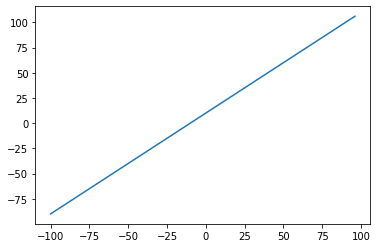

In [22]:
# Visualize data

plt.plot(X, y);

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80 % of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15 % of the data available.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15 % of the total data available.

In [24]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

# Visualizing the data

Now we're got our data in training and test sets... let's visualize it again!

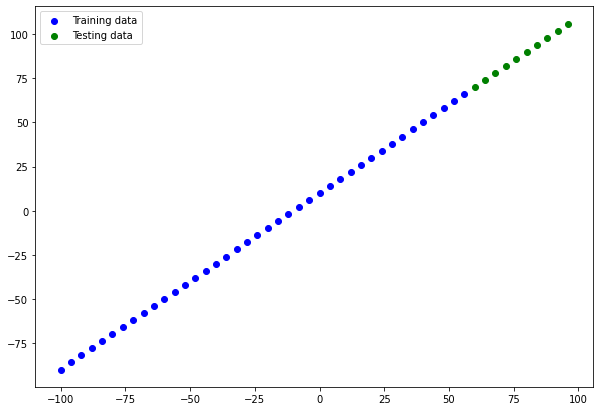

In [26]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot testing data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show a legend
plt.legend();

In [27]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epoch=100)



### Visualizing the model

In [28]:
model.summary()

ValueError: ignored

In [32]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during ***transfer learning***).

In [36]:
# Let's fit our model
# 3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)